<a href="https://colab.research.google.com/github/italomarcelogit/dataframe_performance_pandas_x_polars/blob/main/dataframe_performance_pandas_x_polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import polars as pl
import pandas as pd
import time
import seaborn as sns

In [152]:
arquivo = 'https://github.com/italomarcelogit/scripts-diversos/blob/master/dataset-sales-random/vendas_aleatorio.csv?raw=true'
dados = pd.read_csv(arquivo, nrows=5)
dados

,ID,PRODUTO,CATEGORIA PRODUTO,QTDE,VALOR,DESCONTO,TOTAL,LOJA,VENDEDOR,CLIENTE,SEXO,ESTADO CIVIL,DATA,PERIODO,MES
0,1,T,CA,8,225,0.00,1800.00,GGGG,EEDDD,SMPNYX OLFCZTSM,m,c,2019-04-05,2019-04,4
1,2,G,BB,9,203,0.00,1827.00,FGGG,EDDEE,SYSPIX XWBZQRIM,f,d,2019-01-30,2019-01,1
2,3,E,BB,2,185,0.00,370.00,GFFF,DEDDD,CSLNVB CPDDVMSJ,a,c,2019-05-31,2019-05,5
3,4,R,CA,8,291,0.03,2258.16,FGGG,EEDED,ECOVUH GVCCDNXF,NaN,NaN,2019-02-27,2019-02,2
4,5,X,BC,3,186,0.04,535.68,FGFF,DDEEE,IPJLDL PSTCSGGZ,m,d,2019-08-24,2019-08,8


# Comparação 1: Carga de Dados

In [222]:
# Pandas
inicio = time.time()
df = pd.read_csv(arquivo)
fim = time.time()
tpandas = fim - inicio

In [223]:
# Polars
inicio = time.time()
dfpl = pl.read_csv(arquivo)
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação - Carga de Dados')]

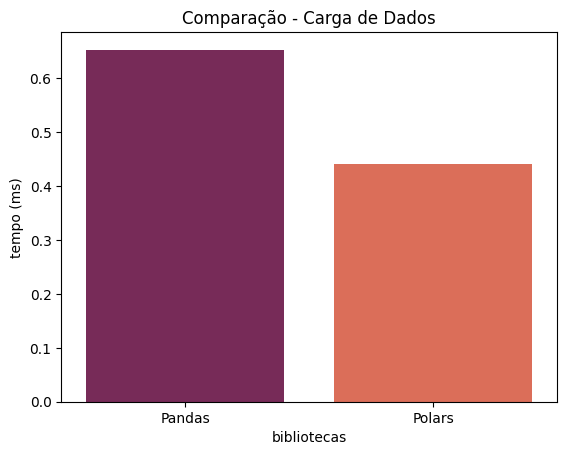

In [224]:
g1 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g1.set(ylabel='tempo (ms)', xlabel='bibliotecas', title='Comparação - Carga de Dados')

Para o conjunto de dados acima, o Pandas levou mais tempo para carregar os dados em uma variável.

# Comparação 2: Sumário dos Dados

In [225]:
# Pandas
inicio = time.time()
df.describe()
fim = time.time()
tpandas = fim - inicio

In [226]:
# Polars
inicio = time.time()
dfpl.describe()
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 2: Sumário dos Dados')]

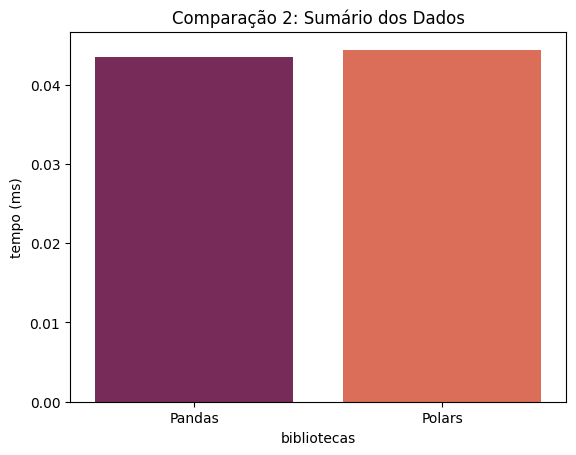

In [227]:
g2 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g2.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
       title='Comparação 2: Sumário dos Dados')

# Comparação 3: Seleção e Filtragem de Dados

## Seleção

In [228]:
# Pandas
inicio = time.time()
df[['PRODUTO', 'VALOR']]
fim = time.time()
tpandas = fim - inicio

In [229]:
# Polars
inicio = time.time()
dfpl.select('PRODUTO', 'VALOR')
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 3;1: Seleção de Dados')]

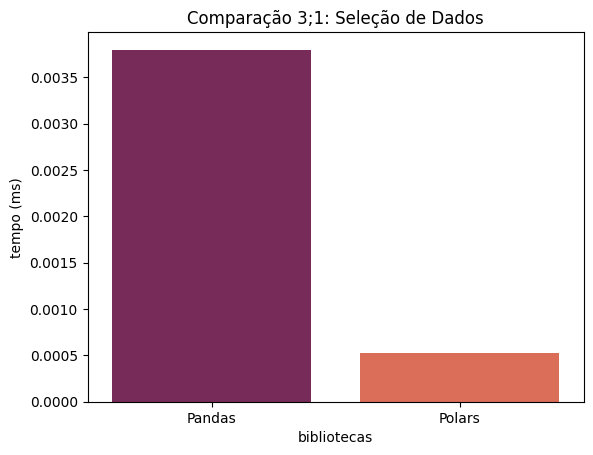

In [230]:
g31 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g31.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
       title='Comparação 3;1: Seleção de Dados')

## Filtro

In [231]:
# Pandas
inicio = time.time()
df.query('ID > 5')
fim = time.time()
tpandas = fim - inicio

In [232]:
# Polars
inicio = time.time()
dfpl.filter(pl.col('ID') > 5)
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 3.2: Filtragem de Dados')]

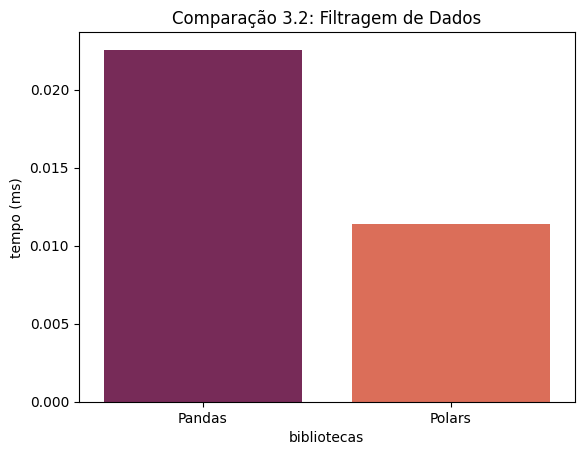

In [233]:
g32 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g32.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 3.2: Filtragem de Dados')

## Contador de valors

In [234]:
# Pandas
inicio = time.time()
df['LOJA'].value_counts
fim = time.time()
tpandas = fim - inicio

In [235]:
# Polars
inicio = time.time()
dfpl['LOJA'].value_counts
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 3.3: Contagem de Valores')]

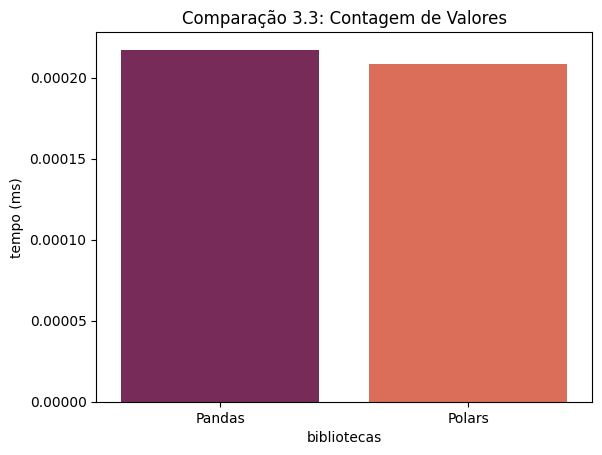

In [236]:
g33 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g33.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 3.3: Contagem de Valores')

## Ordenação

In [237]:
# Pandas
inicio = time.time()
df.sort_values(by='LOJA')
fim = time.time()
tpandas = fim - inicio

In [238]:
# Polars
inicio = time.time()
dfpl.sort('LOJA')
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 3.4: Ordenando Dados')]

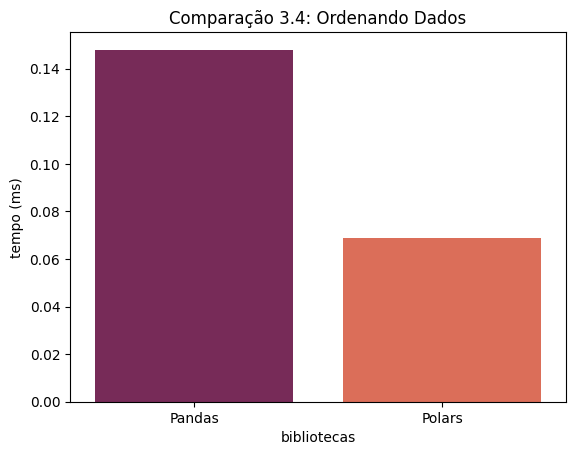

In [239]:
g34 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g34.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 3.4: Ordenando Dados')

## Dados Únicos

In [240]:
# Pandas
inicio = time.time()
df['PRODUTO'].unique()
fim = time.time()
tpandas = fim - inicio

In [241]:
# Polars
inicio = time.time()
dfpl.select('PRODUTO').unique()
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 8: Dados Únicos')]

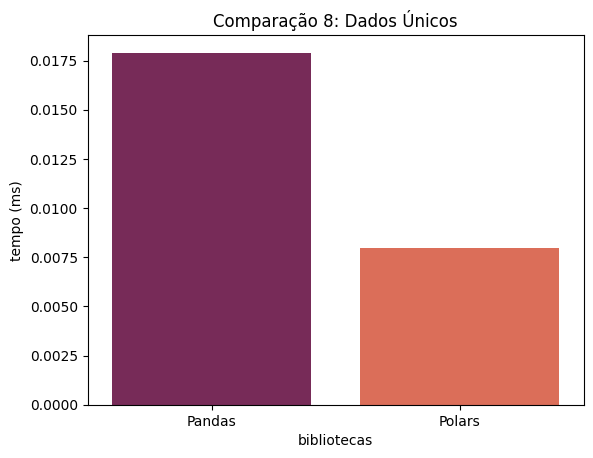

In [242]:
g9 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g9.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 8: Dados Únicos')

# Comparação 4: Dados Faltantes

In [266]:
# Pandas
inicio = time.time()
df.isnull().sum()
fim = time.time()
tpandas = fim - inicio

In [267]:
# Polars
inicio = time.time()
dfpl.null_count()
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 4: Dados Faltantes')]

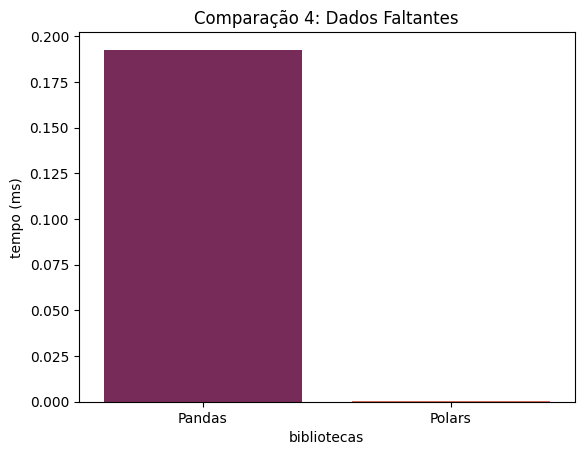

In [268]:
g4 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g4.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 4: Dados Faltantes')

# Comparação 5: Função Apply

In [246]:
# Pandas
inicio = time.time()
df['ID'].apply(lambda x: x * 7)
fim = time.time()
tpandas = fim - inicio

In [247]:
# Polars
inicio = time.time()
dfpl['ID'].apply(lambda x: x * 7)
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 5: Função Apply')]

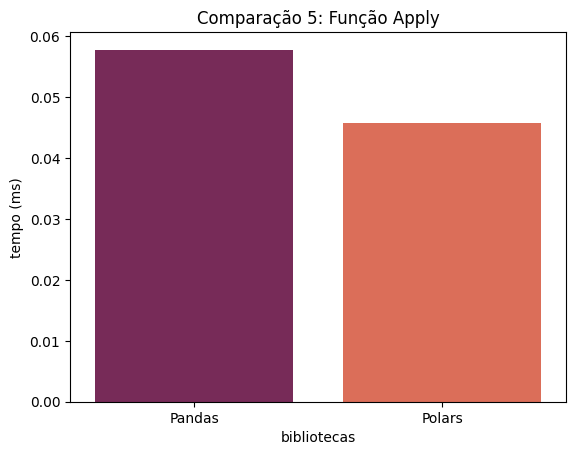

In [248]:
g5 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g5.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 5: Função Apply')

# Comparação 6: Agrupando Dados

In [249]:
# Pandas
inicio = time.time()
df[['ID','SEXO', 'ESTADO CIVIL']].groupby(['SEXO', 'ESTADO CIVIL']).count()
fim = time.time()
tpandas = fim - inicio

In [250]:
# Polars
inicio = time.time()
dfpl.select('ID','SEXO', 'ESTADO CIVIL').groupby('SEXO', 'ESTADO CIVIL').agg(pl.count('ID'))
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 6: Agrupando Dados')]

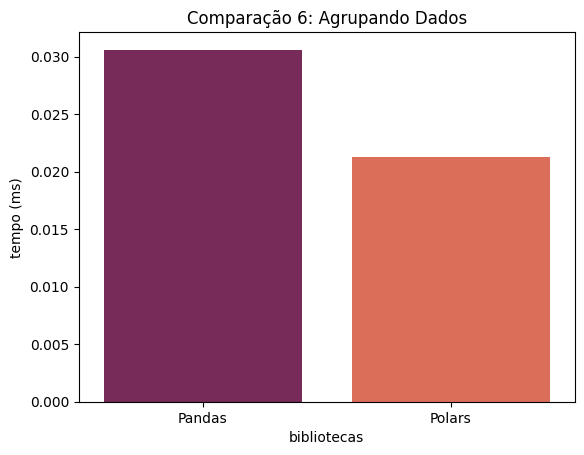

In [251]:
g6 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g6.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 6: Agrupando Dados')

# Comparação 7: Criando Nova Coluna

In [269]:
# Pandas
inicio = time.time()
df['NOVA COLUNA'] = df['ID'] * 7
fim = time.time()
tpandas = fim - inicio

In [270]:
# Polars
inicio = time.time()
dfpl = dfpl.with_columns([(pl.col('ID') * 7).alias('NOVA COLUNA')])
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 7: Criando Nova Coluna')]

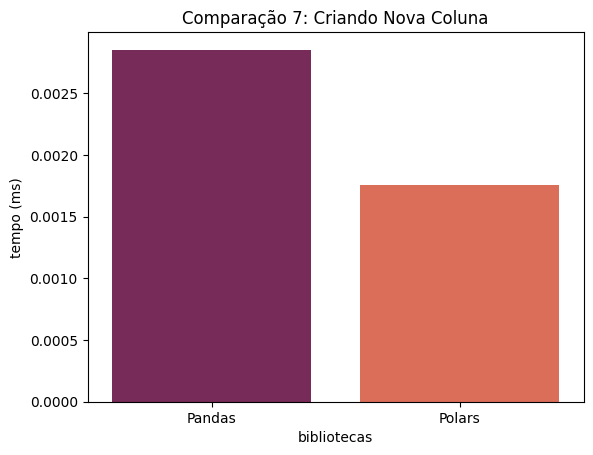

In [271]:
g7 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g7.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 7: Criando Nova Coluna')

# Comparação 8: Excluíndo Colunas

In [255]:
# Pandas
inicio = time.time()
df.drop('NOVA COLUNA', axis=1)
fim = time.time()
tpandas = fim - inicio

In [256]:
# Polars
inicio = time.time()
dfpl.drop('NOVA COLUNA')
fim = time.time()
tpolars = fim - inicio

[Text(0, 0.5, 'tempo (ms)'),
 Text(0.5, 0, 'bibliotecas'),
 Text(0.5, 1.0, 'Comparação 8: Excluindo Coluna')]

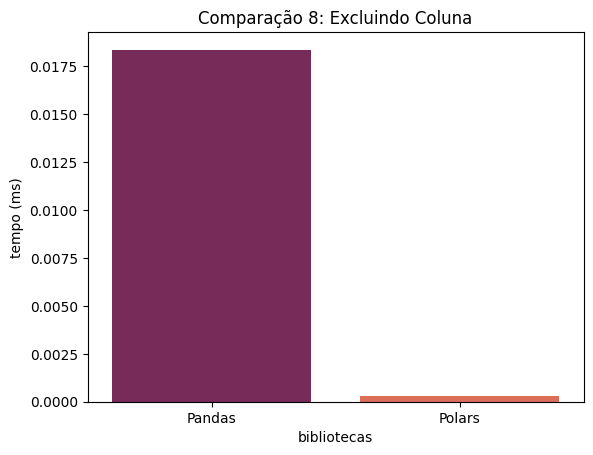

In [257]:
g8 = sns.barplot(x=['Pandas', 'Polars'], y=[tpandas, tpolars], palette='rocket')
g8.set(ylabel='tempo (ms)', xlabel='bibliotecas', 
      title='Comparação 8: Excluindo Coluna')